# Visualizing the distribution of a dataset


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

# Plotting univariate distributions
单变量使用**distplot()**函数绘制直方图**histogram**和KDE图**kernel density estimate**

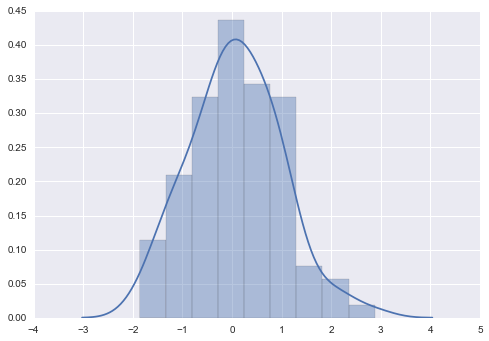

In [2]:
x = np.random.normal(size=100)
sns.distplot(x)

# Histograms

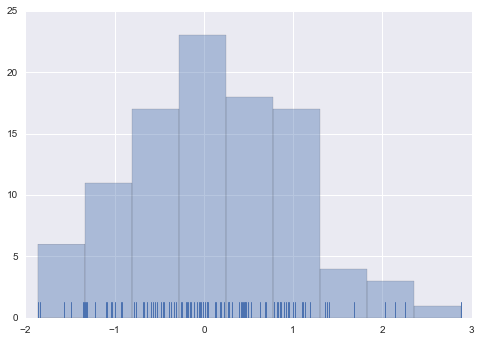

In [3]:
sns.distplot(x, kde=False, rug=True)

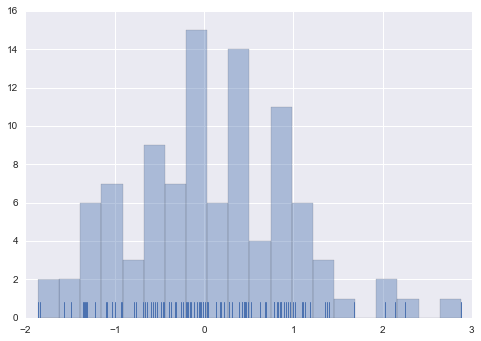

In [4]:
sns.distplot(x, bins=20, kde=False, rug=True)

# Kernel density estimation

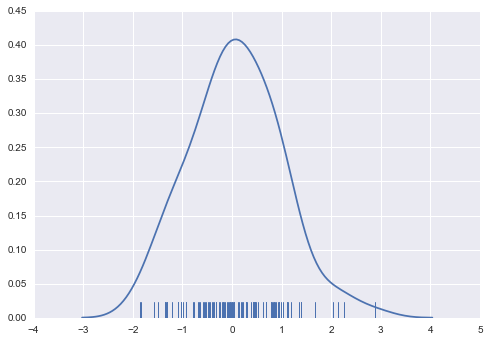

In [5]:
sns.distplot(x, hist=False, kde=True, rug=True)

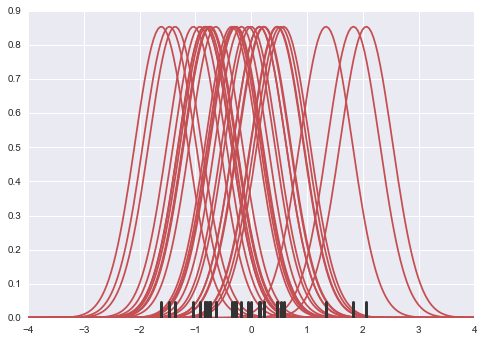

In [7]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

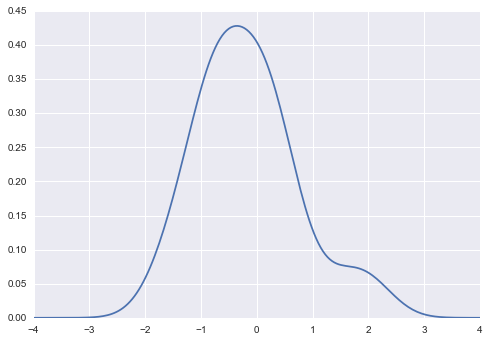

In [8]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

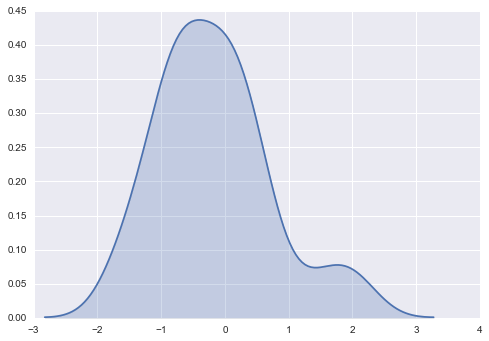

In [10]:
sns.kdeplot(x, shade=True);

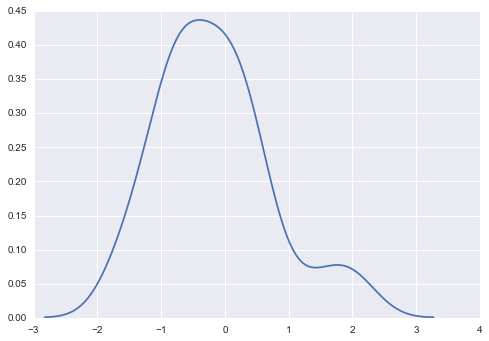

In [13]:
sns.distplot(x, kde=True, hist=False)

# Plotting bivariate distributions
两个变量在seaborn中可以使用**jointplot()**函数查看关系

In [14]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

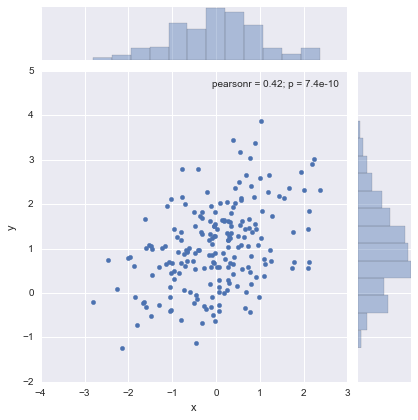

In [15]:
## scatterplots
sns.jointplot(x='x', y='y', data=df)

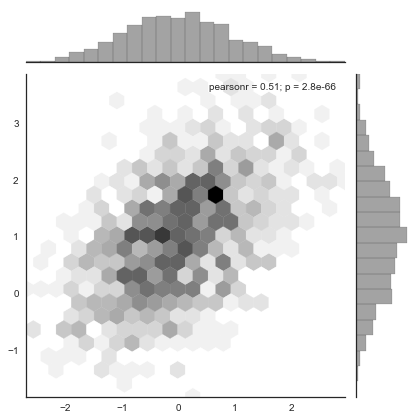

In [16]:
## Hexbin plots
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k")

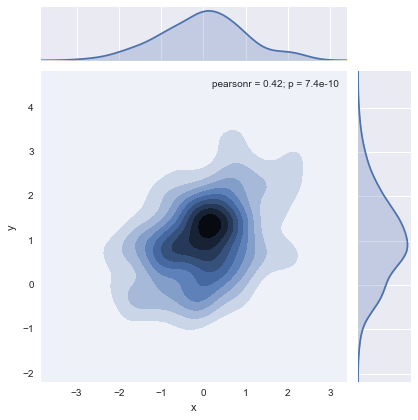

In [17]:
## kernel density estimation
sns.jointplot(x='x', y='y', data=df, kind='kde')

绘制特殊的坐标轴可以使用plt返回的ax对象进行绘制

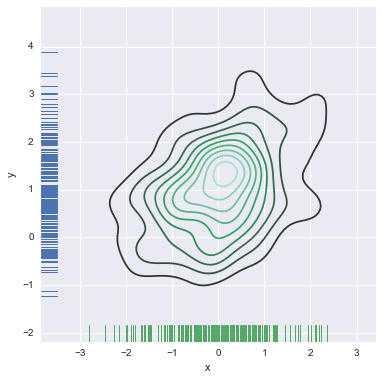

In [21]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color='g', ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax)

**jointplot()**函数使用**JointGrid**管理figure。  
**jointplot()**返回JointGrid对象，在plot之后可以使用这个对象添加新的layer

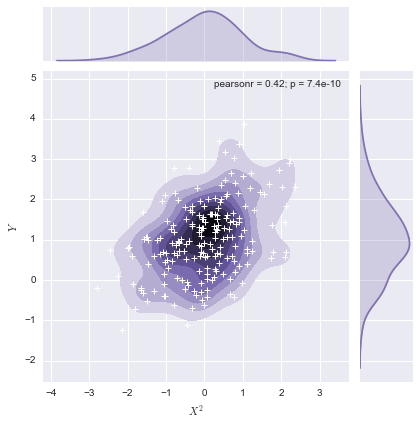

In [24]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X^2$", "$Y$") # 可以直接使用latex

# Visual  pairwise relationships in a dataset
**pairplot()**函数可以创建坐标轴的矩阵并且展示列的pandas中DataFrame中列的pair

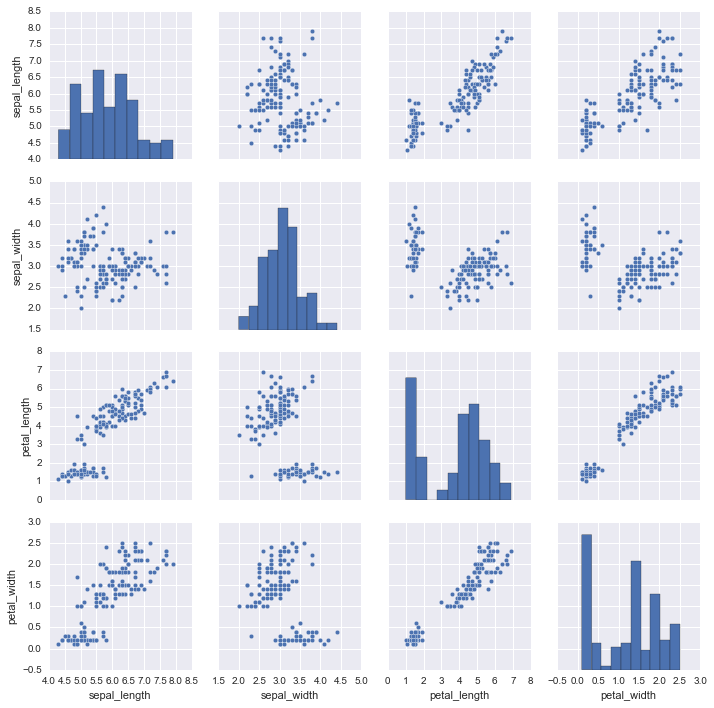

In [25]:
iris = sns.load_dataset('iris')
sns.pairplot(iris)